In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr 
from shapely.geometry import Point, Polygon
import geopandas as gpd
import descartes

print("Import Done")

C:\Users\anand\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Import Done


In [3]:
df_uber_pickups_april = pd.read_csv('datasets/uber-raw-data-apr14.csv')
df_uber_pickups_may = pd.read_csv('datasets/uber-raw-data-may14.csv')
df_uber_pickups_june = pd.read_csv('datasets/uber-raw-data-jun14.csv')
df_uber_pickups_july = pd.read_csv('datasets/uber-raw-data-jul14.csv')
df_uber_pickups_august = pd.read_csv('datasets/uber-raw-data-aug14.csv')
df_uber_pickups_sept = pd.read_csv('datasets/uber-raw-data-sep14.csv')

print("Done")

Done


In [5]:
# df_nyc_block_codes = pd.read_csv('datasets/required/census_block_loc.csv')
df_nyc_demogr_features = pd.read_csv('datasets/nyc_census_tracts.csv')

print("Done")

Done


In [6]:
print("Uber Pickups")

print("April : ", df_uber_pickups_april.shape)
print("May : ", df_uber_pickups_may.shape)
print("June : ", df_uber_pickups_june.shape)
print("July : ", df_uber_pickups_july.shape)
print("August : ", df_uber_pickups_august.shape)
print("September : ", df_uber_pickups_sept.shape)


print("\nNew York City Census")

# print("Block Codes : ", df_nyc_block_codes.shape)
print("Demographic Features : ", df_nyc_demogr_features.shape)

Uber Pickups
April :  (564516, 4)
May :  (652435, 4)
June :  (663844, 4)
July :  (796121, 4)
August :  (829275, 4)
September :  (1028136, 4)

New York City Census
Demographic Features :  (2167, 36)


In [7]:
df_uber_pickups_overall = pd.DataFrame()
df_uber_pickups_overall = df_uber_pickups_overall.append(df_uber_pickups_april)
print(df_uber_pickups_overall.shape)
df_uber_pickups_overall = df_uber_pickups_overall.append(df_uber_pickups_may)
print(df_uber_pickups_overall.shape)
df_uber_pickups_overall = df_uber_pickups_overall.append(df_uber_pickups_june)
print(df_uber_pickups_overall.shape)
df_uber_pickups_overall = df_uber_pickups_overall.append(df_uber_pickups_july)
print(df_uber_pickups_overall.shape)
df_uber_pickups_overall = df_uber_pickups_overall.append(df_uber_pickups_august)
print(df_uber_pickups_overall.shape)
df_uber_pickups_overall = df_uber_pickups_overall.append(df_uber_pickups_sept)
print(df_uber_pickups_overall.shape)

(564516, 4)
(1216951, 4)
(1880795, 4)
(2676916, 4)
(3506191, 4)
(4534327, 4)


In [8]:
df_uber_pickups_overall

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512
...,...,...,...,...
1028131,9/30/2014 22:57:00,40.7668,-73.9845,B02764
1028132,9/30/2014 22:57:00,40.6911,-74.1773,B02764
1028133,9/30/2014 22:58:00,40.8519,-73.9319,B02764
1028134,9/30/2014 22:58:00,40.7081,-74.0066,B02764


In [9]:
df_uber_pickups_overall = df_uber_pickups_overall.round({"Lat":3, "Lon":3})

In [10]:
df_uber_pickups_overall

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.769,-73.955,B02512
1,4/1/2014 0:17:00,40.727,-74.034,B02512
2,4/1/2014 0:21:00,40.732,-73.987,B02512
3,4/1/2014 0:28:00,40.759,-73.978,B02512
4,4/1/2014 0:33:00,40.759,-73.972,B02512
...,...,...,...,...
1028131,9/30/2014 22:57:00,40.767,-73.984,B02764
1028132,9/30/2014 22:57:00,40.691,-74.177,B02764
1028133,9/30/2014 22:58:00,40.852,-73.932,B02764
1028134,9/30/2014 22:58:00,40.708,-74.007,B02764


In [11]:
df_uber_pickups_overall.loc[df_uber_pickups_overall['Lat'] == 40.48]


,Date/Time,Lat,Lon,Base
296635,4/23/2014 19:29:00,40.48,-74.410,B02617
25501,5/21/2014 14:19:00,40.48,-74.409,B02512
3184,6/4/2014 8:05:00,40.48,-74.409,B02512
345743,6/13/2014 14:59:00,40.48,-74.409,B02617
631494,6/26/2014 21:48:00,40.48,-74.408,B02682
174169,8/20/2014 11:44:00,40.48,-74.409,B02598
217501,8/26/2014 18:08:00,40.48,-74.409,B02598
315186,8/6/2014 9:25:00,40.48,-74.271,B02617
558752,8/27/2014 13:10:00,40.48,-74.410,B02617
465472,9/15/2014 16:14:00,40.48,-74.409,B02617


In [12]:
# df_nyc_block_codes

In [13]:
# len(pd.unique(df_nyc_block_codes['BlockCode']))

In [14]:
# plt.scatter(df_nyc_block_codes['BlockCode'], df_nyc_block_codes['State'])
# plt.show()

In [15]:
# df_nyc_block_codes = df_nyc_block_codes.round({"Latitude":3, "Longitude":3})

In [16]:
# df_nyc_block_codes

In [17]:
# df_nyc_block_codes.loc[df_nyc_block_codes['Latitude'] == 40.532]

In [18]:
df_uber_pickups_overall = df_uber_pickups_overall.rename(columns={'Lat' : 'Latitude', 'Lon' : 'Longitude'})

In [19]:
df_uber_pickups_overall

,Date/Time,Latitude,Longitude,Base
0,4/1/2014 0:11:00,40.769,-73.955,B02512
1,4/1/2014 0:17:00,40.727,-74.034,B02512
2,4/1/2014 0:21:00,40.732,-73.987,B02512
3,4/1/2014 0:28:00,40.759,-73.978,B02512
4,4/1/2014 0:33:00,40.759,-73.972,B02512
...,...,...,...,...
1028131,9/30/2014 22:57:00,40.767,-73.984,B02764
1028132,9/30/2014 22:57:00,40.691,-74.177,B02764
1028133,9/30/2014 22:58:00,40.852,-73.932,B02764
1028134,9/30/2014 22:58:00,40.708,-74.007,B02764


In [20]:
# df_integrated = pd.merge(df_uber_pickups_overall, df_nyc_block_codes, on=['Latitude','Longitude'], how='outer')

In [21]:
# df_integrated

In [22]:
# df_integrated.isna().sum()

In [23]:
# df_integrated = df_integrated.dropna(subset=['Date/Time'])

In [24]:
# df_integrated

In [25]:
# len(pd.unique(df_integrated['BlockCode']))

In [26]:
# df_integrated.isna().sum()

In [39]:
df_nyc_demogr_features

,CensusTract,County,Borough,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,36005000100,Bronx,Bronx,7703,7133,570,29.9,6.1,60.9,0.2,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
1,36005000200,Bronx,Bronx,5403,2659,2744,75.8,2.3,16.0,0.0,...,2.9,0.0,0.0,43.0,2308,80.8,16.2,2.9,0.0,7.7
2,36005000400,Bronx,Bronx,5915,2896,3019,62.7,3.6,30.7,0.0,...,1.4,0.5,2.1,45.0,2675,71.7,25.3,2.5,0.6,9.5
3,36005001600,Bronx,Bronx,5879,2558,3321,65.1,1.6,32.4,0.0,...,8.6,1.6,1.7,38.8,2120,75.0,21.3,3.8,0.0,8.7
4,36005001900,Bronx,Bronx,2591,1206,1385,55.4,9.0,29.0,0.0,...,3.0,2.4,6.2,45.4,1083,76.8,15.5,7.7,0.0,19.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2162,36085030302,Richmond,Staten Island,6279,3093,3186,35.8,28.7,17.6,0.0,...,0.9,0.0,1.3,46.6,2668,74.4,22.5,3.2,0.0,6.2
2163,36085031901,Richmond,Staten Island,2550,953,1597,27.1,6.2,60.4,0.0,...,9.5,0.0,0.0,38.2,710,73.8,21.8,4.4,0.0,13.8
2164,36085031902,Richmond,Staten Island,4611,2043,2568,20.9,14.7,61.9,0.0,...,0.5,0.0,2.7,40.9,1308,84.7,12.6,2.7,0.0,9.4
2165,36085032300,Richmond,Staten Island,1131,597,534,45.5,24.0,29.7,0.0,...,4.9,0.0,0.0,52.5,534,65.0,31.1,3.9,0.0,10.7


In [41]:
df_nyc_demogr_features.loc[df_nyc_demogr_features['Borough'] == 'Staten Island']

,CensusTract,County,Borough,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
2057,36085000300,Richmond,Staten Island,1738,917,821,19.8,41.0,17.4,0.0,...,16.1,5.1,1.7,46.9,888,82.1,13.0,5.0,0.0,11.7
2058,36085000600,Richmond,Staten Island,2297,1051,1246,13.8,68.9,3.5,0.0,...,6.6,1.4,1.8,43.2,1057,82.9,15.5,1.6,0.0,8.1
2059,36085000700,Richmond,Staten Island,5997,2915,3082,30.5,15.6,42.8,0.0,...,7.6,0.9,1.4,47.8,2576,74.0,19.1,6.9,0.0,5.9
2060,36085000800,Richmond,Staten Island,5678,2713,2965,26.8,51.9,3.8,0.0,...,5.1,2.6,2.4,40.5,2548,66.9,29.7,2.9,0.5,3.7
2061,36085000900,Richmond,Staten Island,1860,958,902,36.2,15.5,43.0,0.0,...,5.9,0.7,4.0,49.6,807,74.0,20.3,5.1,0.6,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2162,36085030302,Richmond,Staten Island,6279,3093,3186,35.8,28.7,17.6,0.0,...,0.9,0.0,1.3,46.6,2668,74.4,22.5,3.2,0.0,6.2
2163,36085031901,Richmond,Staten Island,2550,953,1597,27.1,6.2,60.4,0.0,...,9.5,0.0,0.0,38.2,710,73.8,21.8,4.4,0.0,13.8
2164,36085031902,Richmond,Staten Island,4611,2043,2568,20.9,14.7,61.9,0.0,...,0.5,0.0,2.7,40.9,1308,84.7,12.6,2.7,0.0,9.4
2165,36085032300,Richmond,Staten Island,1131,597,534,45.5,24.0,29.7,0.0,...,4.9,0.0,0.0,52.5,534,65.0,31.1,3.9,0.0,10.7


In [27]:
gdf1 = gpd.read_file('datasets/nyct2020wi_21c/nyct2020wi.shp')

In [28]:
gdf1.head()

,CTLabel,BoroCode,BoroName,CT2020,BoroCT2020,CDEligibil,NTAName,NTA2020,CDTA2020,CDTANAME,GEOID,Shape_Leng,Shape_Area,geometry
0,1,1,Manhattan,000100,1000100,None,The Battery-Governors Island-Ellis Island-Libe...,MN0191,MN01,MN01 Financial District-Tribeca (CD 1 Equivalent),36061000100,11023.048688,1.844421e+06,"MULTIPOLYGON (((972081.788 190733.467, 972184...."
1,2.01,1,Manhattan,000201,1000201,None,Chinatown-Two Bridges,MN0301,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061000201,8010.305223,1.887578e+06,"POLYGON ((988012.660 196152.484, 987984.769 19..."
2,2.02,1,Manhattan,000202,1000202,None,Lower East Side,MN0302,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061000202,11469.903914,7.874189e+06,"POLYGON ((990021.719 196479.331, 990013.071 19..."
3,5,1,Manhattan,000500,1000500,None,The Battery-Governors Island-Ellis Island-Libe...,MN0191,MN01,MN01 Financial District-Tribeca (CD 1 Equivalent),36061000500,28392.268264,4.532272e+07,"POLYGON ((979979.564 194059.132, 980002.438 19..."
4,6,1,Manhattan,000600,1000600,None,Chinatown-Two Bridges,MN0301,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061000600,9372.015660,4.429331e+06,"POLYGON ((986961.185 199553.643, 987206.139 19..."


In [29]:
gdf1.shape

(2327, 14)

In [30]:
gdf1.crs

{'proj': 'lcc',
 'lat_1': 40.66666666666666,
 'lat_2': 41.03333333333333,
 'lat_0': 40.16666666666666,
 'lon_0': -74,
 'x_0': 300000,
 'y_0': 0,
 'datum': 'NAD83',
 'units': 'us-ft',
 'no_defs': True}

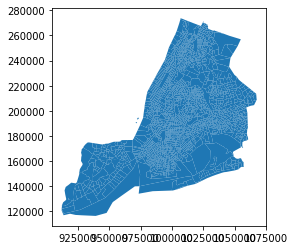

In [31]:
gdf1.plot()

In [36]:
gdf1.loc[gdf1['GEOID'] == '36005000100']

,CTLabel,BoroCode,BoroName,CT2020,BoroCT2020,CDEligibil,NTAName,NTA2020,CDTA2020,CDTANAME,GEOID,Shape_Leng,Shape_Area,geometry
310,1,2,Bronx,000100,2000100,None,Rikers Island,QN0151,QN01,QN01 Astoria-Queensbridge (CD 1 Equivalent),36005000100,23294.359087,2.914108e+07,"POLYGON ((1020189.930 227453.078, 1019979.009 ..."


In [37]:
len(pd.unique(gdf1['GEOID']))

2327

In [38]:
gdf1 = gdf1.rename(columns={'GEOID' : 'CensusTract'})
gdf1.head()

,CTLabel,BoroCode,BoroName,CT2020,BoroCT2020,CDEligibil,NTAName,NTA2020,CDTA2020,CDTANAME,CensusTract,Shape_Leng,Shape_Area,geometry
0,1,1,Manhattan,000100,1000100,None,The Battery-Governors Island-Ellis Island-Libe...,MN0191,MN01,MN01 Financial District-Tribeca (CD 1 Equivalent),36061000100,11023.048688,1.844421e+06,"MULTIPOLYGON (((972081.788 190733.467, 972184...."
1,2.01,1,Manhattan,000201,1000201,None,Chinatown-Two Bridges,MN0301,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061000201,8010.305223,1.887578e+06,"POLYGON ((988012.660 196152.484, 987984.769 19..."
2,2.02,1,Manhattan,000202,1000202,None,Lower East Side,MN0302,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061000202,11469.903914,7.874189e+06,"POLYGON ((990021.719 196479.331, 990013.071 19..."
3,5,1,Manhattan,000500,1000500,None,The Battery-Governors Island-Ellis Island-Libe...,MN0191,MN01,MN01 Financial District-Tribeca (CD 1 Equivalent),36061000500,28392.268264,4.532272e+07,"POLYGON ((979979.564 194059.132, 980002.438 19..."
4,6,1,Manhattan,000600,1000600,None,Chinatown-Two Bridges,MN0301,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061000600,9372.015660,4.429331e+06,"POLYGON ((986961.185 199553.643, 987206.139 19..."


In [42]:
gdf1["CensusTract"] = pd.to_numeric(gdf1["CensusTract"])
gdf1.dtypes

CTLabel          object
BoroCode         object
BoroName         object
CT2020           object
BoroCT2020       object
CDEligibil       object
NTAName          object
NTA2020          object
CDTA2020         object
CDTANAME         object
CensusTract       int64
Shape_Leng      float64
Shape_Area      float64
geometry       geometry
dtype: object

In [43]:
gdf1_integrated = gdf1.merge(df_nyc_demogr_features, on='CensusTract')

In [44]:
gdf1_integrated

,CTLabel,BoroCode,BoroName,CT2020,BoroCT2020,CDEligibil,NTAName,NTA2020,CDTA2020,CDTANAME,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1,1,Manhattan,000100,1000100,None,The Battery-Governors Island-Ellis Island-Libe...,MN0191,MN01,MN01 Financial District-Tribeca (CD 1 Equivalent),...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2.01,1,Manhattan,000201,1000201,None,Chinatown-Two Bridges,MN0301,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),...,28.2,6.3,1.7,33.0,1105,90.1,7.1,2.8,0.0,2.6
2,2.02,1,Manhattan,000202,1000202,None,Lower East Side,MN0302,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),...,29.7,9.1,7.0,30.9,2667,74.1,19.8,6.1,0.0,15.1
3,5,1,Manhattan,000500,1000500,None,The Battery-Governors Island-Ellis Island-Libe...,MN0191,MN01,MN01 Financial District-Tribeca (CD 1 Equivalent),...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
4,6,1,Manhattan,000600,1000600,None,Chinatown-Two Bridges,MN0301,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),...,37.6,5.1,2.9,30.3,4028,85.0,10.2,4.8,0.0,8.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2031,303.02,5,Staten Island,030302,5030302,None,Mariner's Harbor-Arlington-Graniteville,SI0107,SI01,SI01 North Shore (CD 1 Equivalent),...,0.9,0.0,1.3,46.6,2668,74.4,22.5,3.2,0.0,6.2
2032,319.01,5,Staten Island,031901,5031901,None,Mariner's Harbor-Arlington-Graniteville,SI0107,SI01,SI01 North Shore (CD 1 Equivalent),...,9.5,0.0,0.0,38.2,710,73.8,21.8,4.4,0.0,13.8
2033,319.02,5,Staten Island,031902,5031902,None,Mariner's Harbor-Arlington-Graniteville,SI0107,SI01,SI01 North Shore (CD 1 Equivalent),...,0.5,0.0,2.7,40.9,1308,84.7,12.6,2.7,0.0,9.4
2034,323,5,Staten Island,032300,5032300,None,Mariner's Harbor-Arlington-Graniteville,SI0107,SI01,SI01 North Shore (CD 1 Equivalent),...,4.9,0.0,0.0,52.5,534,65.0,31.1,3.9,0.0,10.7
